In [1]:
# This R environment comes with many helpful analytics packages installed
# It is defined by the kaggle/rstats Docker image: https://github.com/kaggle/docker-rstats
# For example, here's a helpful package to load

library(tidyverse) # metapackage of all tidyverse packages

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

list.files(path = "../input")

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

options(repr.plot.width = 13.0, repr.plot.height = 13.0)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


[1] "amazon-stock-dataset-1997-2021"

# **Import**

In [2]:
library(dplyr)
library(psych)
library(gridExtra)
library(zoo)
library(ggplot2)
library(corrplot)
library(ggcorrplot)


Attaching package: ‘psych’


The following objects are masked from ‘package:ggplot2’:

    %+%, alpha



Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine



Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric


corrplot 0.92 loaded



# **1. Data Import**

In [3]:
data <- read.csv('/kaggle/input/amazon-stock-dataset-1997-2021/AMZN.csv')

**Variable Information**

* **Date: The date of the trading session.**

* **Open: The opening price of the asset at the beginning of the trading session.**

* **High: The highest price reached by the asset during the trading session.**

* **Low: The lowest price reached by the asset during the trading session.**

* **Close: The closing price of the asset at the end of the trading session.**

* **Adj Close: The adjusted closing price, possibly accounting for factors such as dividends and stock splits.**

* **Volume: The trading volume, indicating the total number of shares or contracts traded during the session.**

In [4]:
str(data)

'data.frame':	6516 obs. of  7 variables:
 $ Date     : chr  "1997-05-15" "1997-05-16" "1997-05-19" "1997-05-20" ...
 $ Open     : num  0.1219 0.0984 0.088 0.0865 0.0818 ...
 $ High     : num  0.125 0.099 0.0885 0.0875 0.0823 ...
 $ Low      : num  0.0964 0.0854 0.0813 0.0818 0.0688 ...
 $ Close    : num  0.0979 0.0865 0.0854 0.0818 0.0714 ...
 $ Adj.Close: num  0.0979 0.0865 0.0854 0.0818 0.0714 ...
 $ Volume   : int  1443120000 294000000 122136000 109344000 377064000 235536000 318744000 173952000 91488000 69456000 ...


In [5]:
describe(data)

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Date*,1,6516,3.258500e+03,1.881152e+03,3.25850e+03,3.258500e+03,2.415155e+03,1.0000e+00,6.516000e+03,6.515000e+03,0.000000,-1.200553,2.330415e+01
Open,2,6516,3.161163e+01,4.809534e+01,6.45675e+00,2.066836e+01,8.410543e+00,7.0313e-02,1.872000e+02,1.871297e+02,1.699734,1.693180,5.958164e-01
High,3,6516,3.199200e+01,4.865965e+01,6.53550e+00,2.090126e+01,8.479638e+00,7.2396e-02,1.886540e+02,1.885816e+02,1.699442,1.686030,6.028072e-01
Low,4,6516,3.119343e+01,4.746448e+01,6.35325e+00,2.040821e+01,8.305155e+00,6.5625e-02,1.848395e+02,1.847739e+02,1.699776,1.699045,5.880011e-01
Close,5,6516,3.159974e+01,4.806026e+01,6.44425e+00,2.066600e+01,8.399438e+00,6.9792e-02,1.865705e+02,1.865007e+02,1.698497,1.687710,5.953818e-01
Adj.Close,6,6516,3.159974e+01,4.806026e+01,6.44425e+00,2.066600e+01,8.399438e+00,6.9792e-02,1.865705e+02,1.865007e+02,1.698497,1.687710,5.953818e-01
Volume,7,6516,1.425338e+08,1.401619e+08,1.05905e+08,1.159813e+08,6.285483e+07,9.7440e+06,2.086584e+09,2.076840e+09,4.639543,33.509833,1.736359e+06


In [6]:
summary(data)

     Date                Open                High               Low           
 Length:6516        Min.   :  0.07031   Min.   :  0.0724   Min.   :  0.06563  
 Class :character   1st Qu.:  1.99888   1st Qu.:  2.0285   1st Qu.:  1.96475  
 Mode  :character   Median :  6.45675   Median :  6.5355   Median :  6.35325  
                    Mean   : 31.61163   Mean   : 31.9920   Mean   : 31.19343  
                    3rd Qu.: 38.45137   3rd Qu.: 38.6880   3rd Qu.: 38.20300  
                    Max.   :187.20000   Max.   :188.6540   Max.   :184.83949  
     Close             Adj.Close             Volume         
 Min.   :  0.06979   Min.   :  0.06979   Min.   :9.744e+06  
 1st Qu.:  2.00125   1st Qu.:  2.00125   1st Qu.:6.888e+07  
 Median :  6.44425   Median :  6.44425   Median :1.059e+08  
 Mean   : 31.59974   Mean   : 31.59974   Mean   :1.425e+08  
 3rd Qu.: 38.46463   3rd Qu.: 38.46463   3rd Qu.:1.608e+08  
 Max.   :186.57050   Max.   :186.57050   Max.   :2.087e+09  

**Check missing value**

In [7]:
sum(is.na(data))

[1] 0

**duplicate check**

In [8]:
sum(duplicated(data))

[1] 0

# **2. Data Transform**

In [9]:
data$Date <- as.Date(data$Date)

In [10]:
names(data) <- c('Date','Open','High','Low','Close','Adj','Volume')

**Date Check**

In [11]:
head(data)

,Date,Open,High,Low,Close,Adj,Volume
,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,1997-05-15,0.121875,0.125000,0.096354,0.097917,0.097917,1443120000
2,1997-05-16,0.098438,0.098958,0.085417,0.086458,0.086458,294000000
3,1997-05-19,0.088021,0.088542,0.081250,0.085417,0.085417,122136000
4,1997-05-20,0.086458,0.087500,0.081771,0.081771,0.081771,109344000
5,1997-05-21,0.081771,0.082292,0.068750,0.071354,0.071354,377064000
6,1997-05-22,0.071875,0.072396,0.065625,0.069792,0.069792,235536000


# **3. Data Visualization**

**Histogram**

In [12]:
p1 <- ggplot(data, aes(x= Open)) + geom_histogram(fill = 'skyblue',binwidth = 10) + theme_bw()
p2 <-ggplot(data, aes(x= High)) + geom_histogram(fill = 'blue',binwidth = 10) + theme_bw()
p3 <-ggplot(data, aes(x= Low)) + geom_histogram(fill = 'orange',binwidth = 10) + theme_bw()
p4 <-ggplot(data, aes(x= Close)) + geom_histogram(fill = 'green',binwidth = 10) + theme_bw()
p5 <-ggplot(data, aes(x= Adj)) + geom_histogram(fill = 'yellow',binwidth = 10) + theme_bw()
p6 <-ggplot(data, aes(x= Volume)) + geom_histogram(fill = 'red') + theme_bw()

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


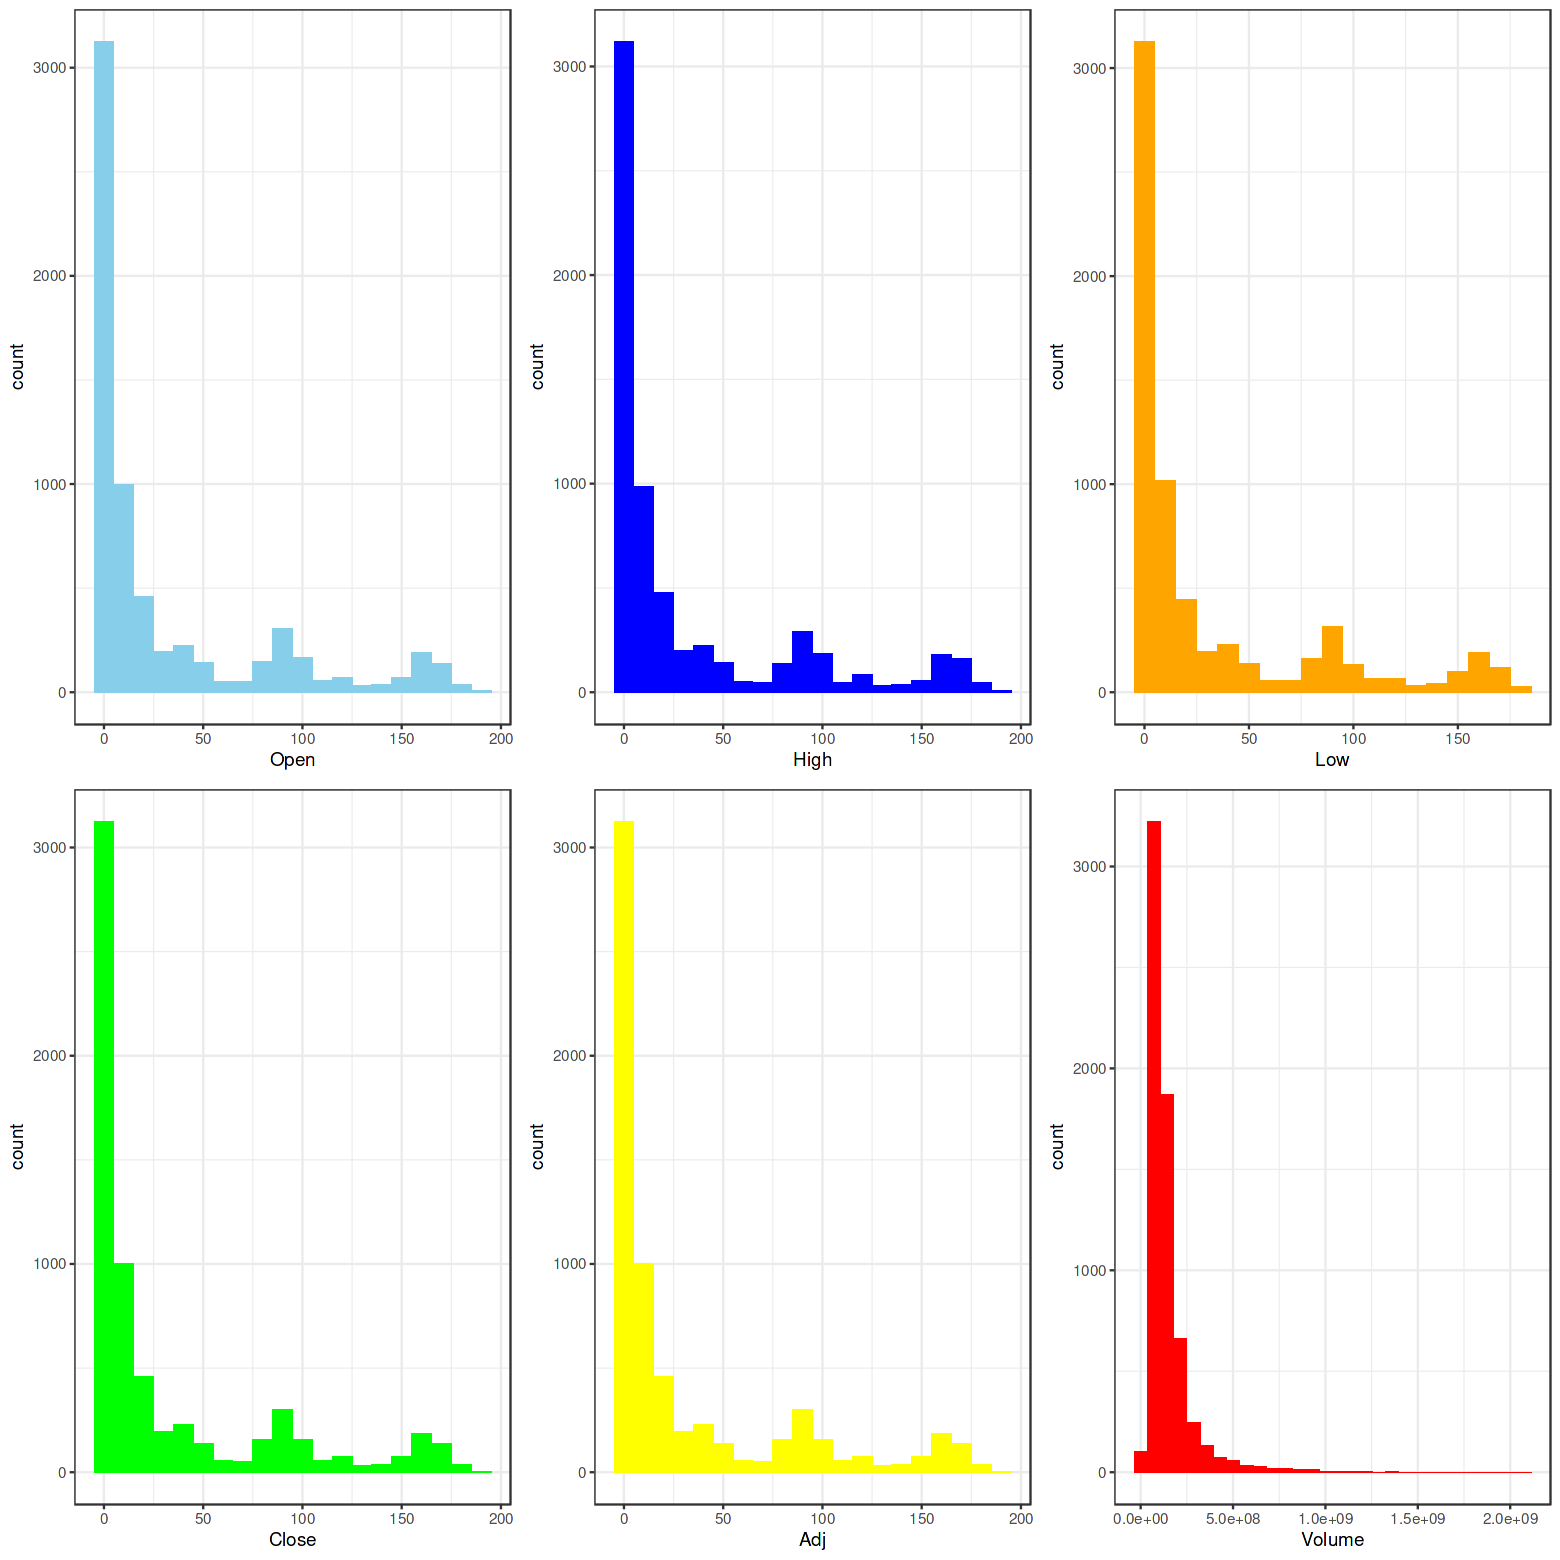

In [13]:
grid.arrange(p1,p2,p3,p4,p5,p6, ncol = 3)

**Boxplot**

In [14]:
p1 <- ggplot(data, aes(x= Open)) + geom_boxplot(fill = 'skyblue') + theme_bw()
p2 <-ggplot(data, aes(x= High)) + geom_boxplot(fill = 'blue') + theme_bw()
p3 <-ggplot(data, aes(x= Low)) + geom_boxplot(fill = 'orange') + theme_bw()
p4 <-ggplot(data, aes(x= Close)) + geom_boxplot(fill = 'green') + theme_bw()
p5 <-ggplot(data, aes(x= Adj)) + geom_boxplot(fill = 'yellow') + theme_bw()
p6 <-ggplot(data, aes(x= Volume)) + geom_boxplot(fill = 'red') + theme_bw() + scale_x_log10()

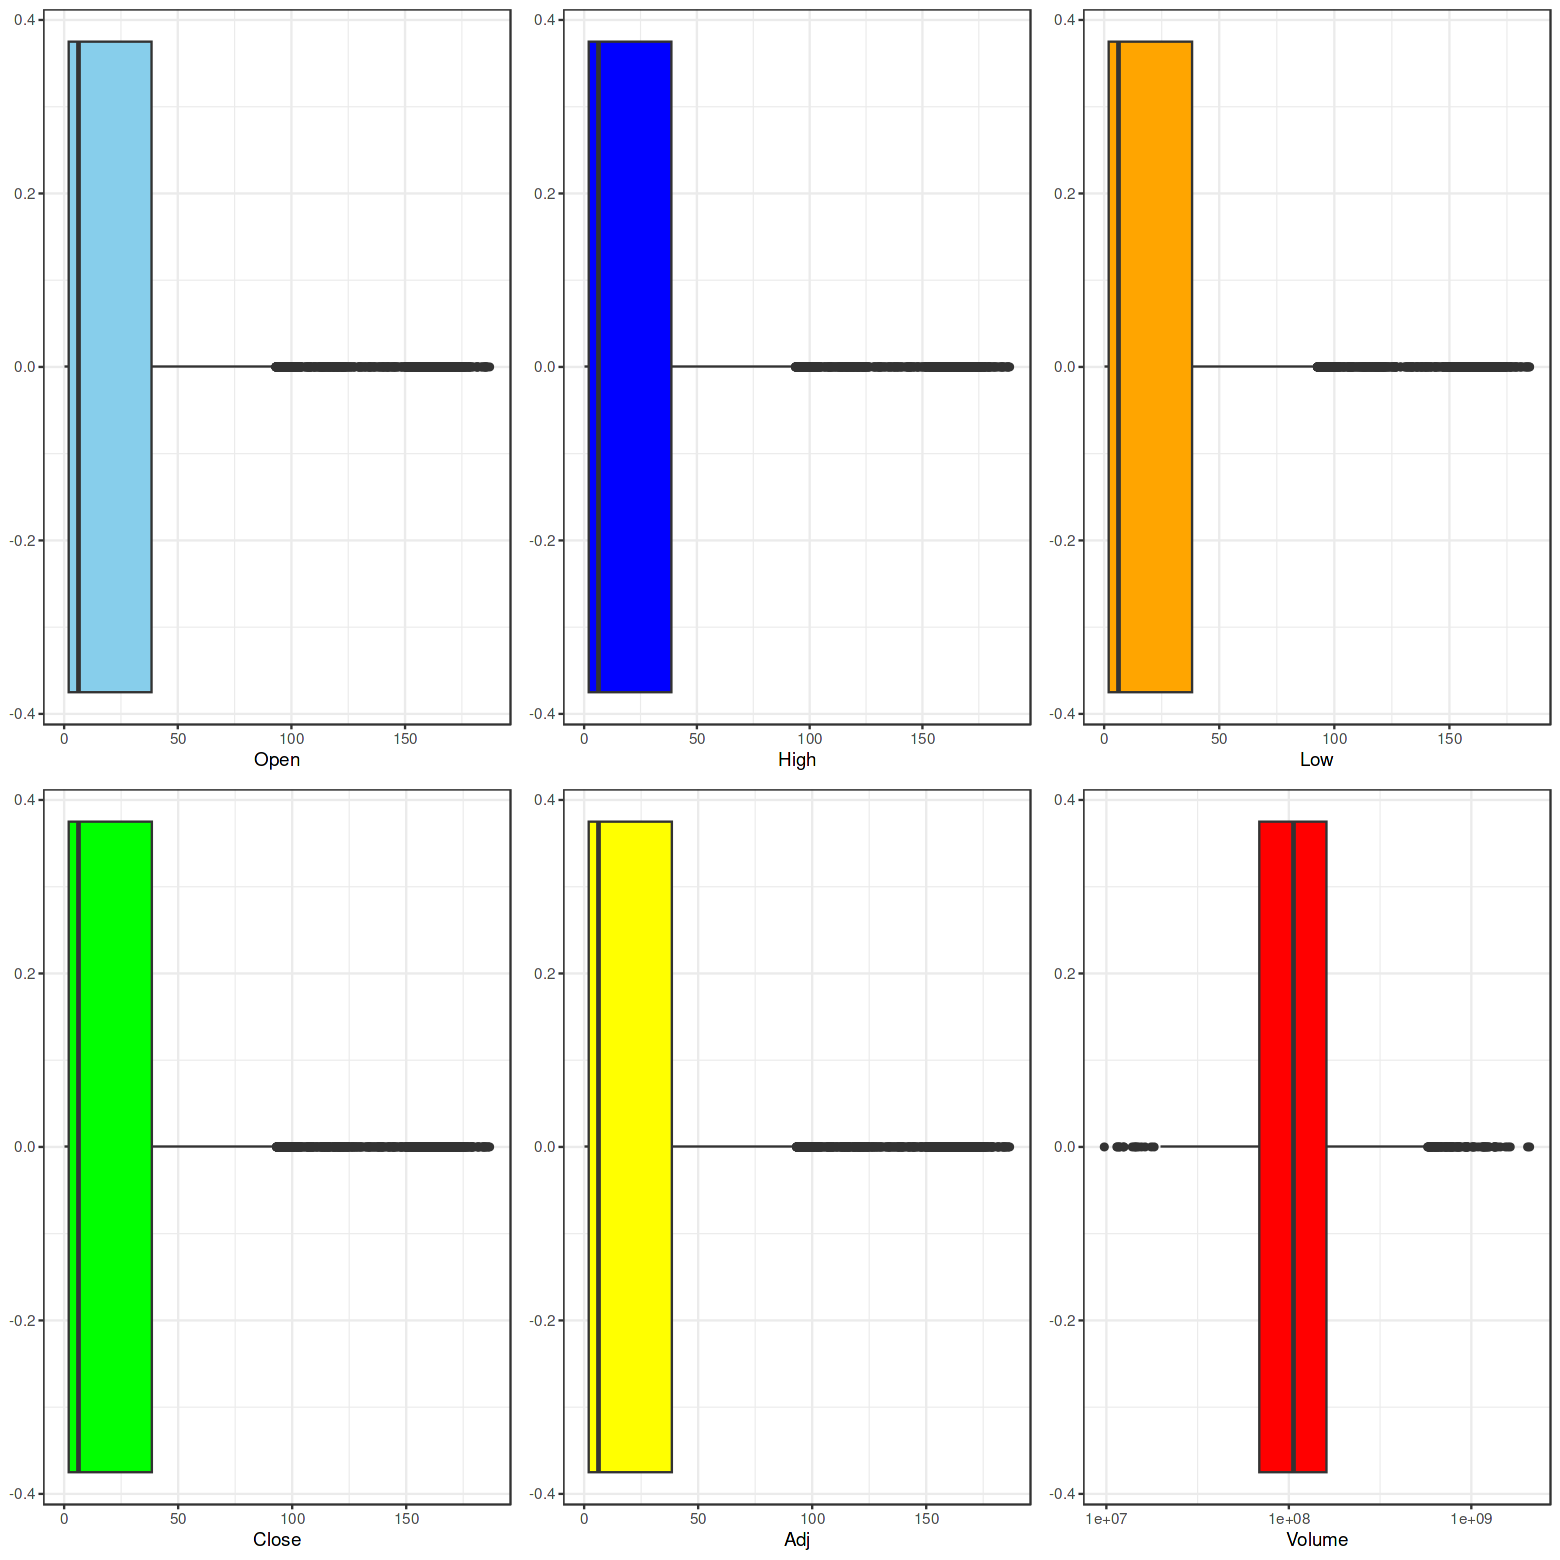

In [15]:
grid.arrange(p1,p2,p3,p4,p5,p6, ncol = 3)

**Year-to-year change**

In [16]:
p1 <- ggplot(data, aes(x=Date, y= Open)) + geom_line() + ggtitle('Change in \'Open\' by year') + theme_bw()
p2 <- ggplot(data, aes(x=Date, y= High)) + geom_line() + ggtitle('Change in \'High\' by year') + theme_bw()
p3 <- ggplot(data, aes(x=Date, y= Low)) + geom_line() + ggtitle('Change in \'Low\' by year') + theme_bw()
p4 <- ggplot(data, aes(x=Date, y= Close)) + geom_line() + ggtitle('Change in \'Close\' by year') + theme_bw()
p5 <- ggplot(data, aes(x=Date, y= Adj)) + geom_line() + ggtitle('Change in \'Adj\' by year') + theme_bw()
p6 <- ggplot(data, aes(x=Date, y= Volume)) + geom_line() + ggtitle('Change in \'Volume\' by year') + theme_bw() + scale_y_log10()

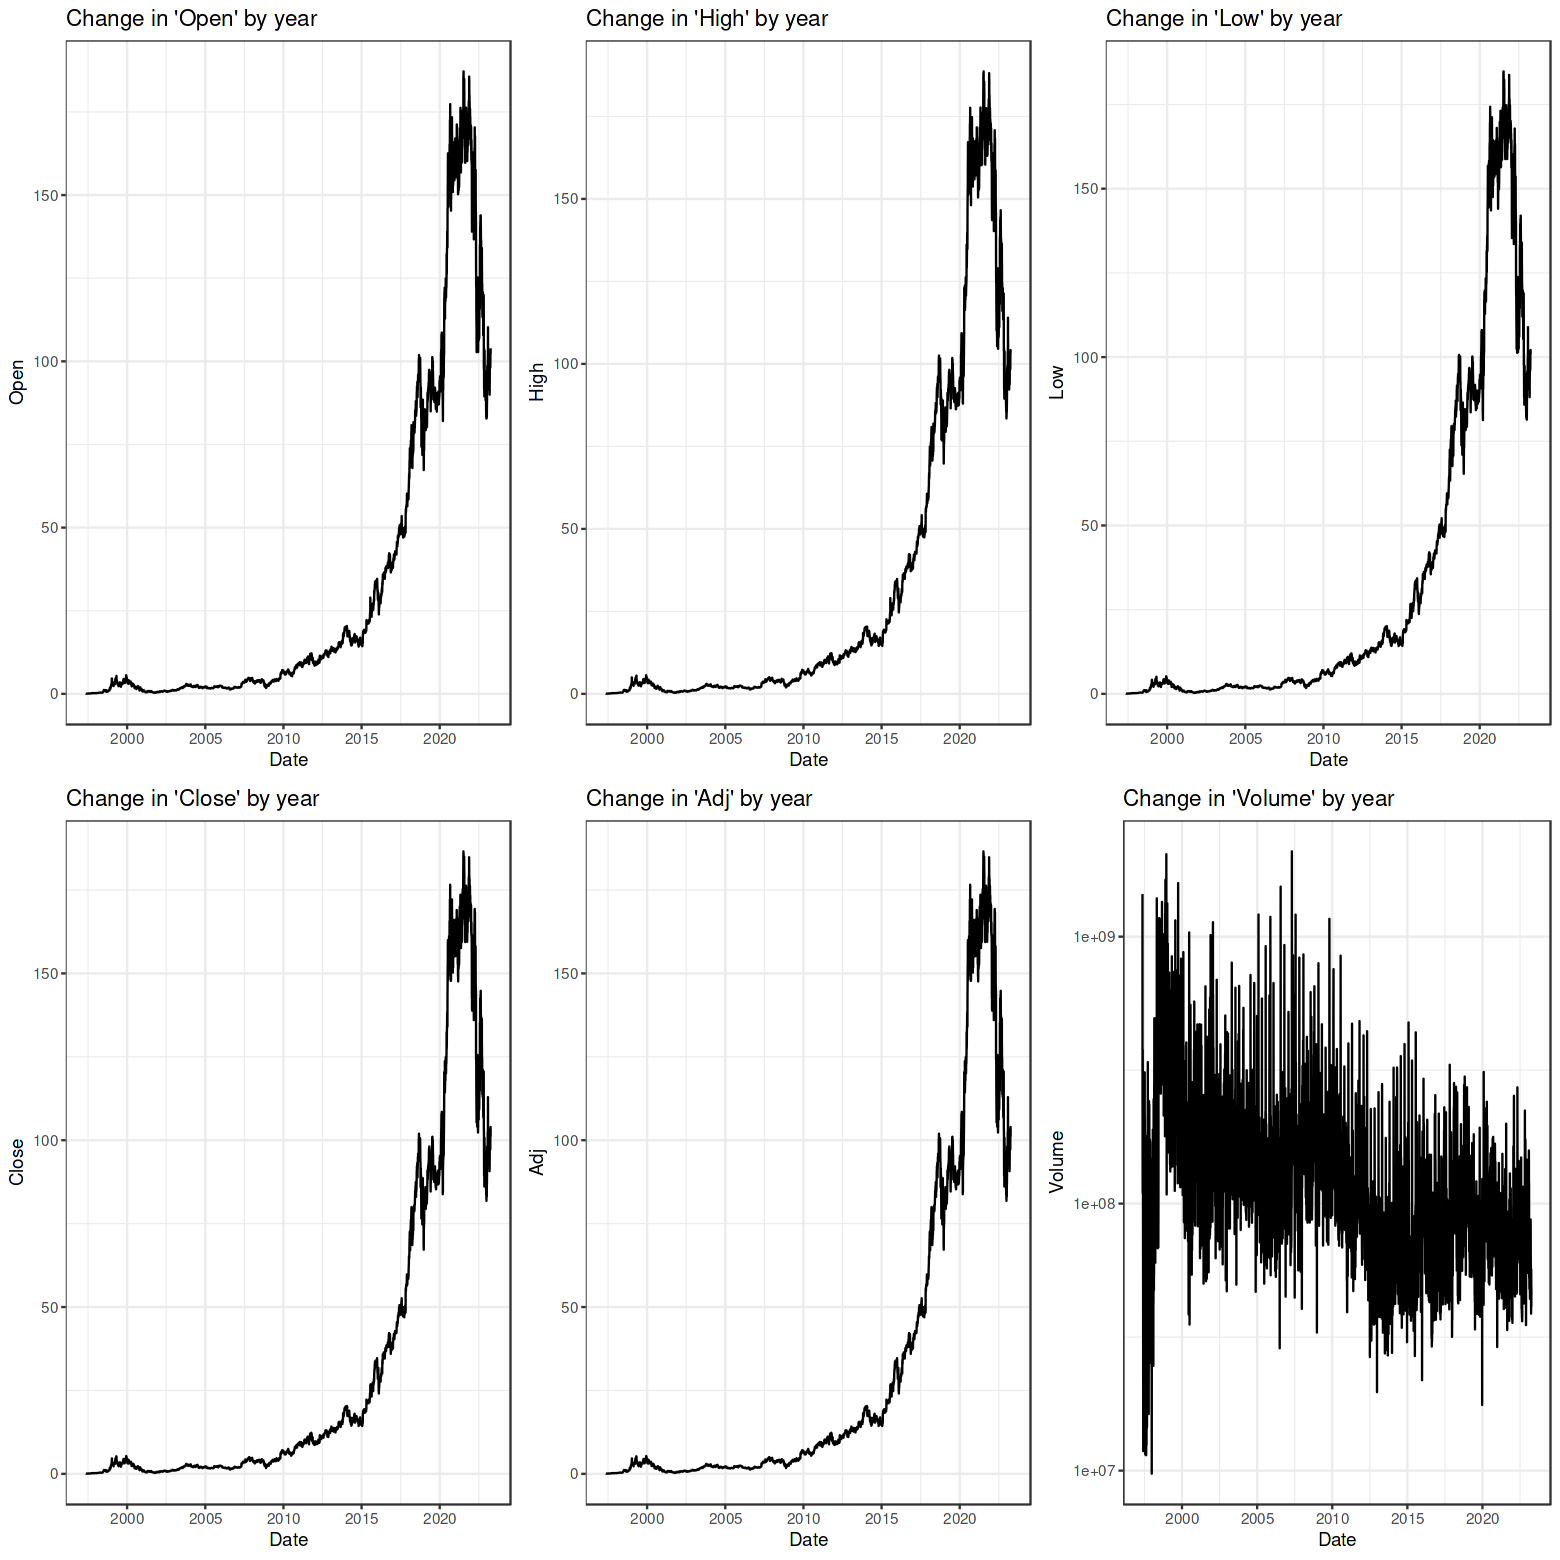

In [17]:
grid.arrange(p1,p2,p3,p4,p5,p6, ncol = 3)

------------

**Check the moving average(300 Days) of Close**

In [18]:
temp <- zoo(data$Close, data$Date)

In [19]:
temp_rollmean <- rollmean(temp, 10, fill = list(NA, NULL, NA))

In [20]:
data$mean_close <- coredata(temp_rollmean)

Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”
Warning message:
“Removed 9 rows containing missing values (`geom_line()`).”


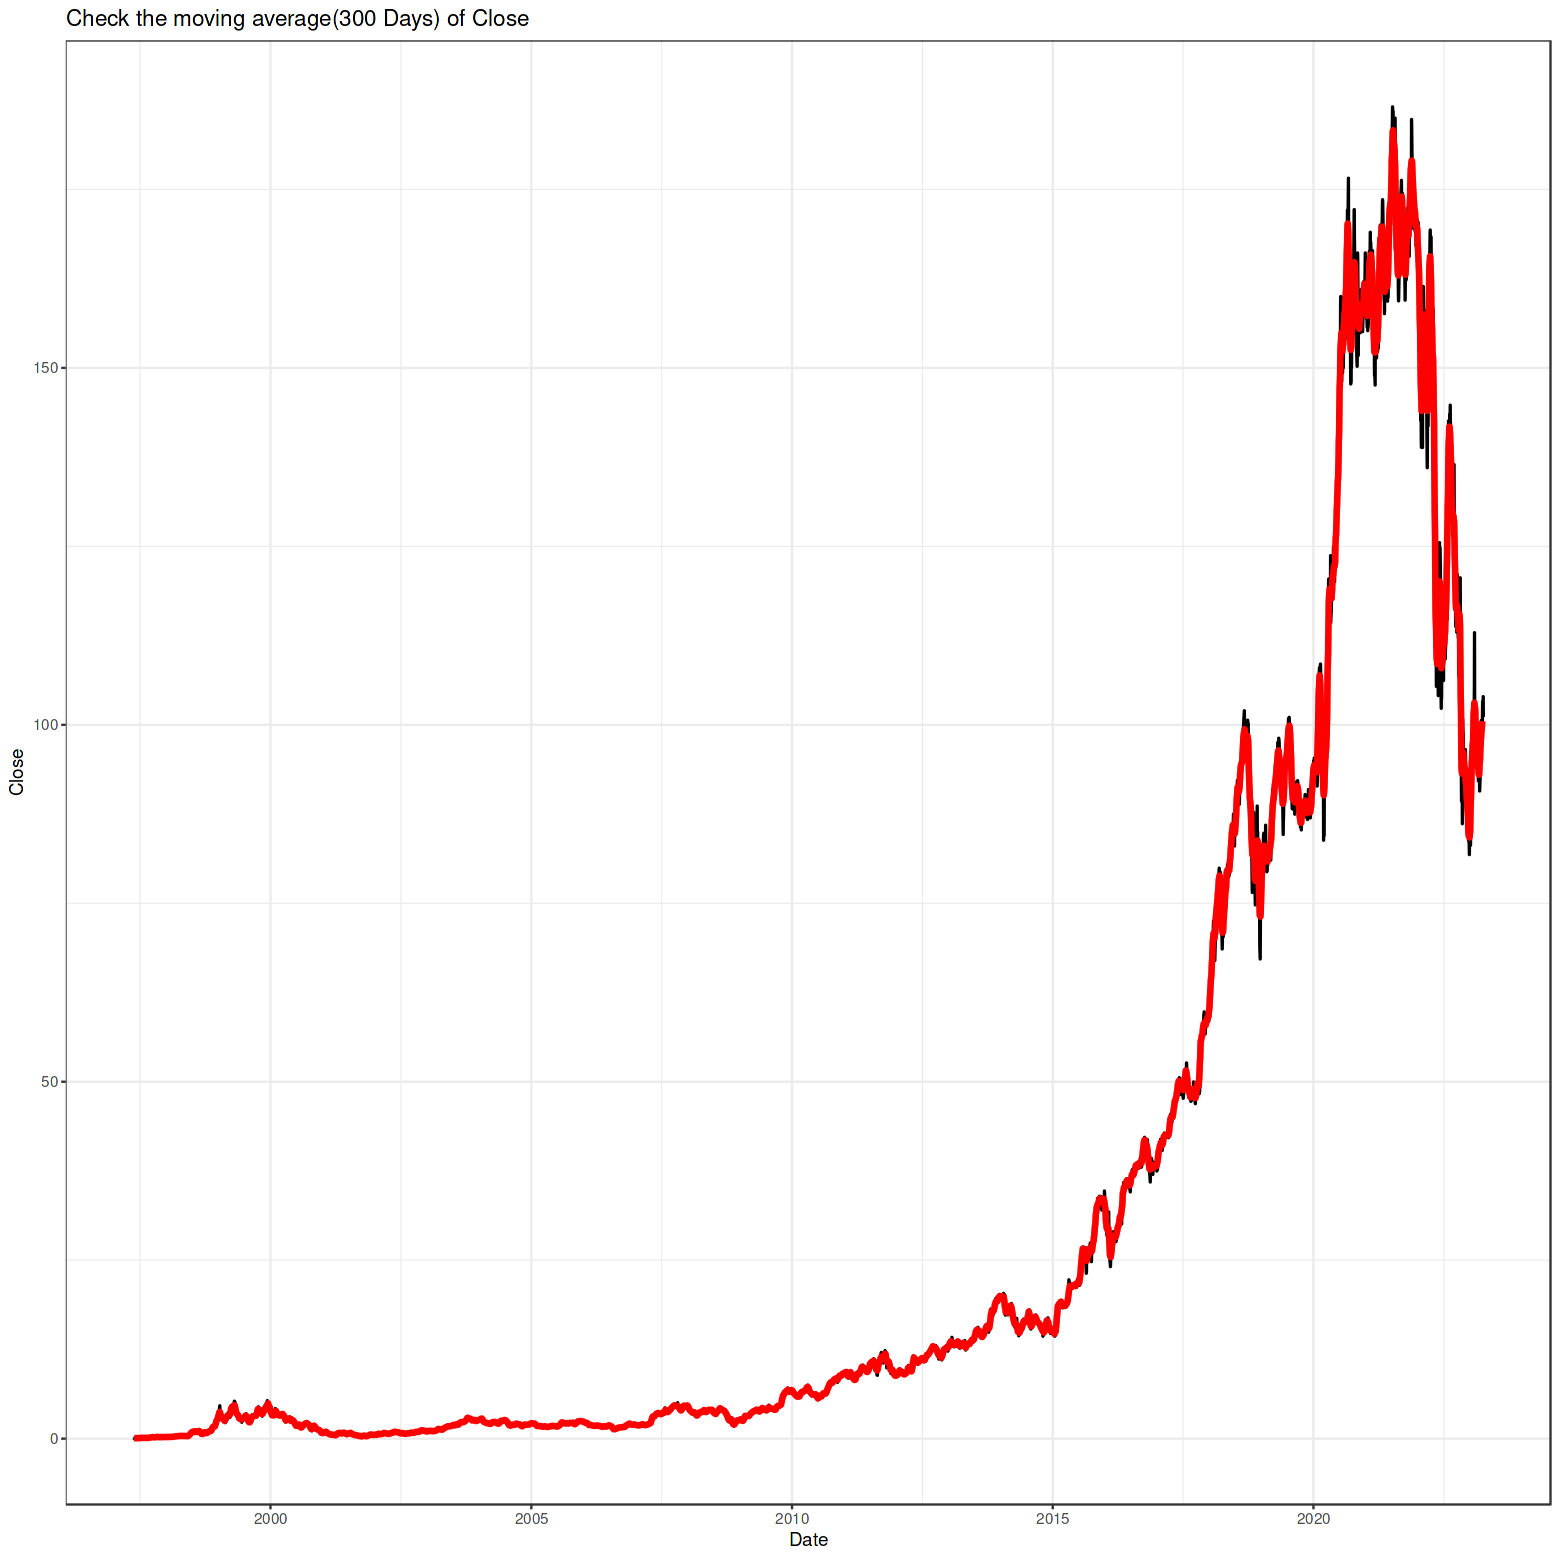

In [21]:
ggplot(data, aes(x = Date, y = Close)) + 
        geom_line(color = 'black', size = 0.7) +
        geom_line(aes(Date, mean_close), color = 'red', size = 1.4) +
        theme_bw() +
        ggtitle('Check the moving average(300 Days) of Close')

------------

**Correlation**

In [22]:
num_cols <- c('Open','High','Low','Close','Adj','Volume')

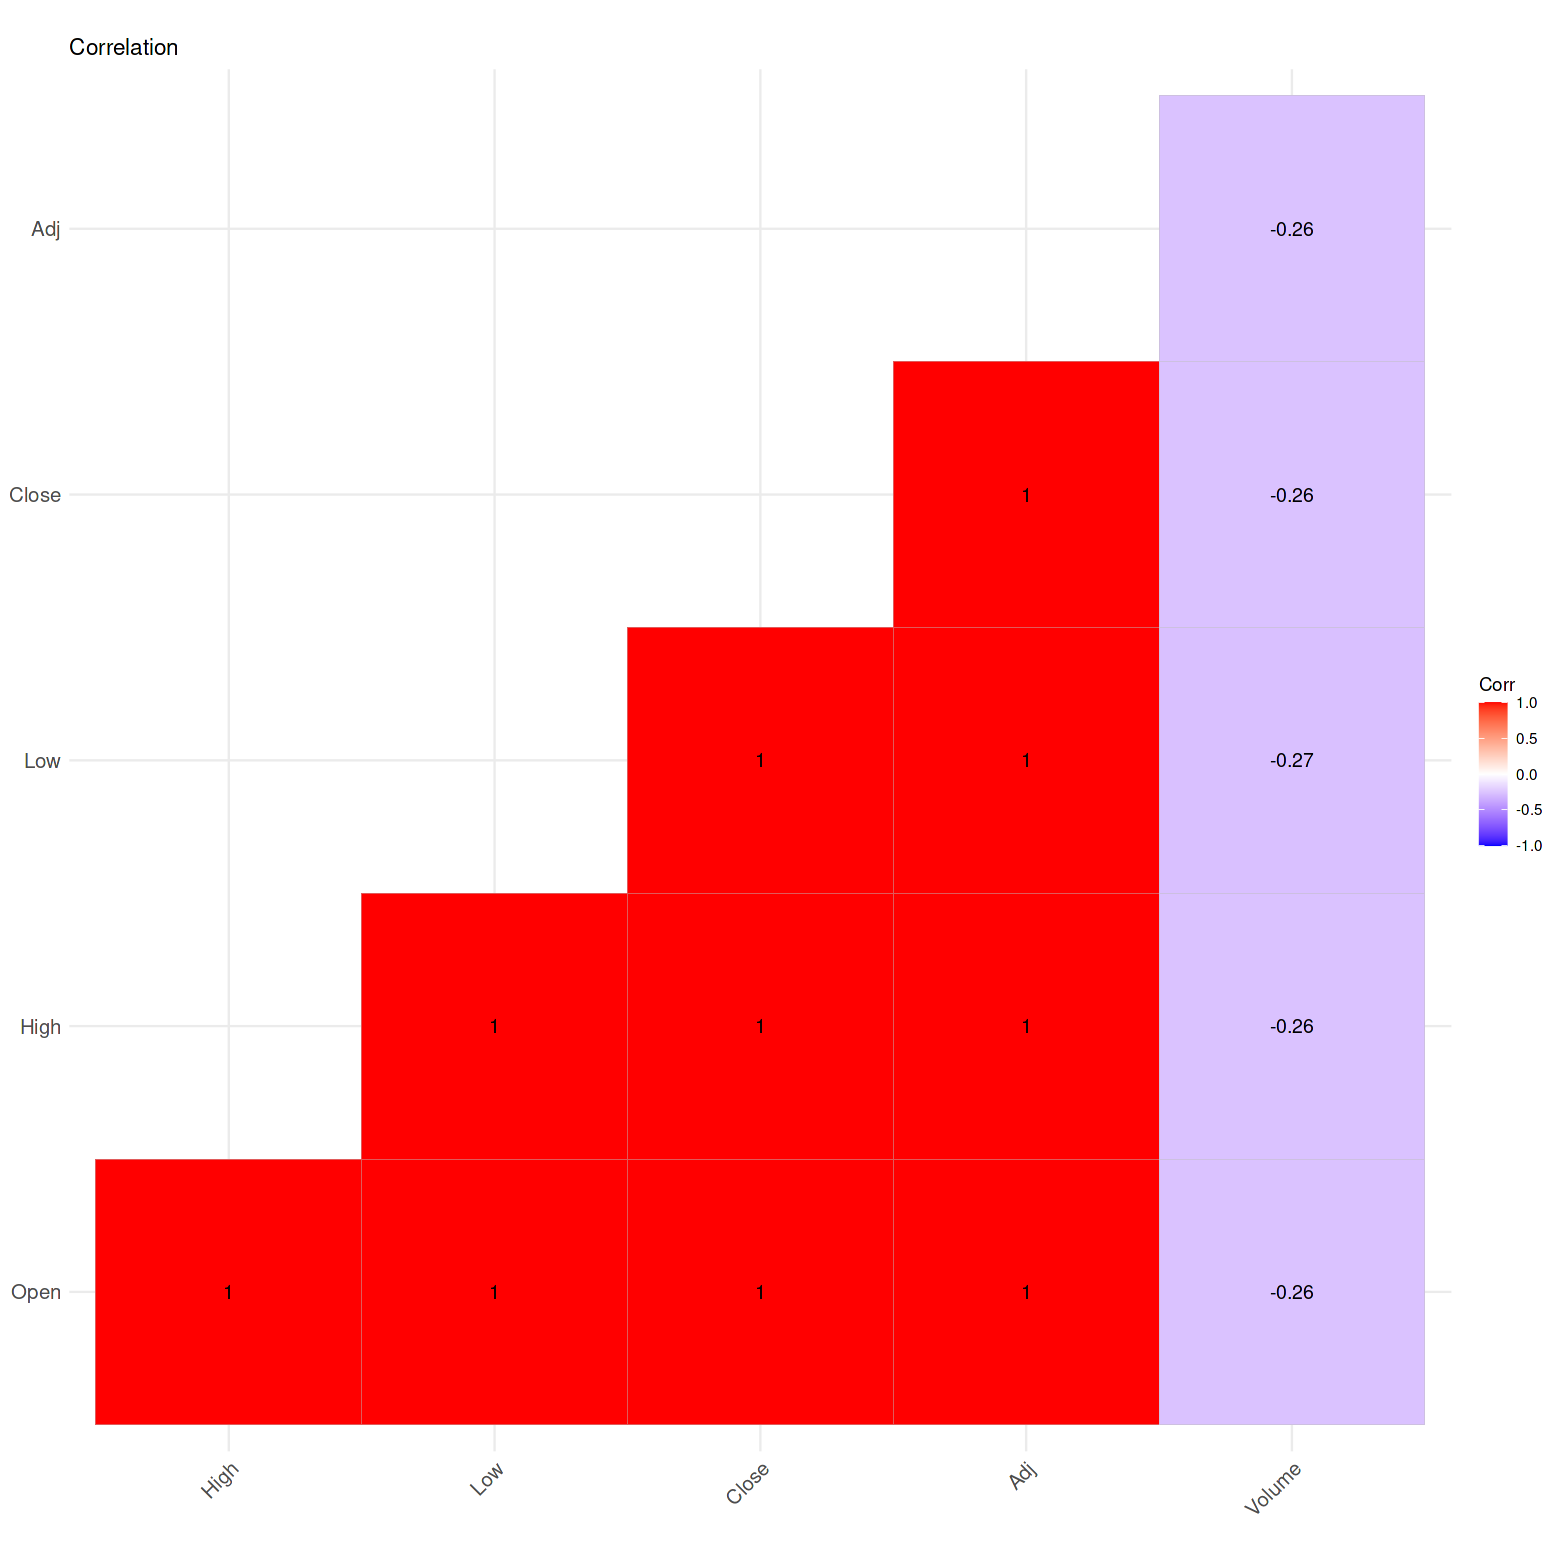

In [23]:
ggcorrplot(cor(data[,num_cols]) , type = "lower", lab=T, title = 'Correlation')

------------

# **4. Modeling**

In [24]:
library(Metrics)

In [25]:
data <- data[,2:7]

In [26]:
LR <- lm(Close ~., data)

In [27]:
summary(LR)

Warning message in summary.lm(LR):
“essentially perfect fit: summary may be unreliable”



Call:
lm(formula = Close ~ ., data = data)

Residuals:
       Min         1Q     Median         3Q        Max 
-4.762e-15 -6.000e-19  7.000e-19  2.400e-18  3.268e-16 

Coefficients:
              Estimate Std. Error    t value Pr(>|t|)    
(Intercept)  1.775e-15  1.335e-18  1.330e+03   <2e-16 ***
Open         1.301e-16  1.860e-18  6.995e+01   <2e-16 ***
High        -2.291e-16  2.003e-18 -1.144e+02   <2e-16 ***
Low         -1.344e-16  1.881e-18 -7.146e+01   <2e-16 ***
Adj          1.000e+00  1.816e-18  5.505e+17   <2e-16 ***
Volume      -8.264e-27  5.781e-27 -1.429e+00    0.153    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6.235e-17 on 6510 degrees of freedom
Multiple R-squared:      1,	Adjusted R-squared:      1 
F-statistic: 7.742e+38 on 5 and 6510 DF,  p-value: < 2.2e-16


**Select Variable**

In [28]:
LR <- lm(Close ~ Open+High+Low+Adj, data)

In [29]:
summary(LR)

Warning message in summary.lm(LR):
“essentially perfect fit: summary may be unreliable”



Call:
lm(formula = Close ~ Open + High + Low + Adj, data = data)

Residuals:
       Min         1Q     Median         3Q        Max 
-4.764e-15 -4.000e-19  9.000e-19  2.100e-18  3.276e-16 

Coefficients:
              Estimate Std. Error    t value Pr(>|t|)    
(Intercept)  1.775e-15  9.247e-19  1.920e+03   <2e-16 ***
Open         1.301e-16  1.860e-18  6.995e+01   <2e-16 ***
High        -2.291e-16  1.996e-18 -1.148e+02   <2e-16 ***
Low         -1.344e-16  1.876e-18 -7.165e+01   <2e-16 ***
Adj          1.000e+00  1.816e-18  5.505e+17   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6.236e-17 on 6511 degrees of freedom
Multiple R-squared:      1,	Adjusted R-squared:      1 
F-statistic: 9.676e+38 on 4 and 6511 DF,  p-value: < 2.2e-16


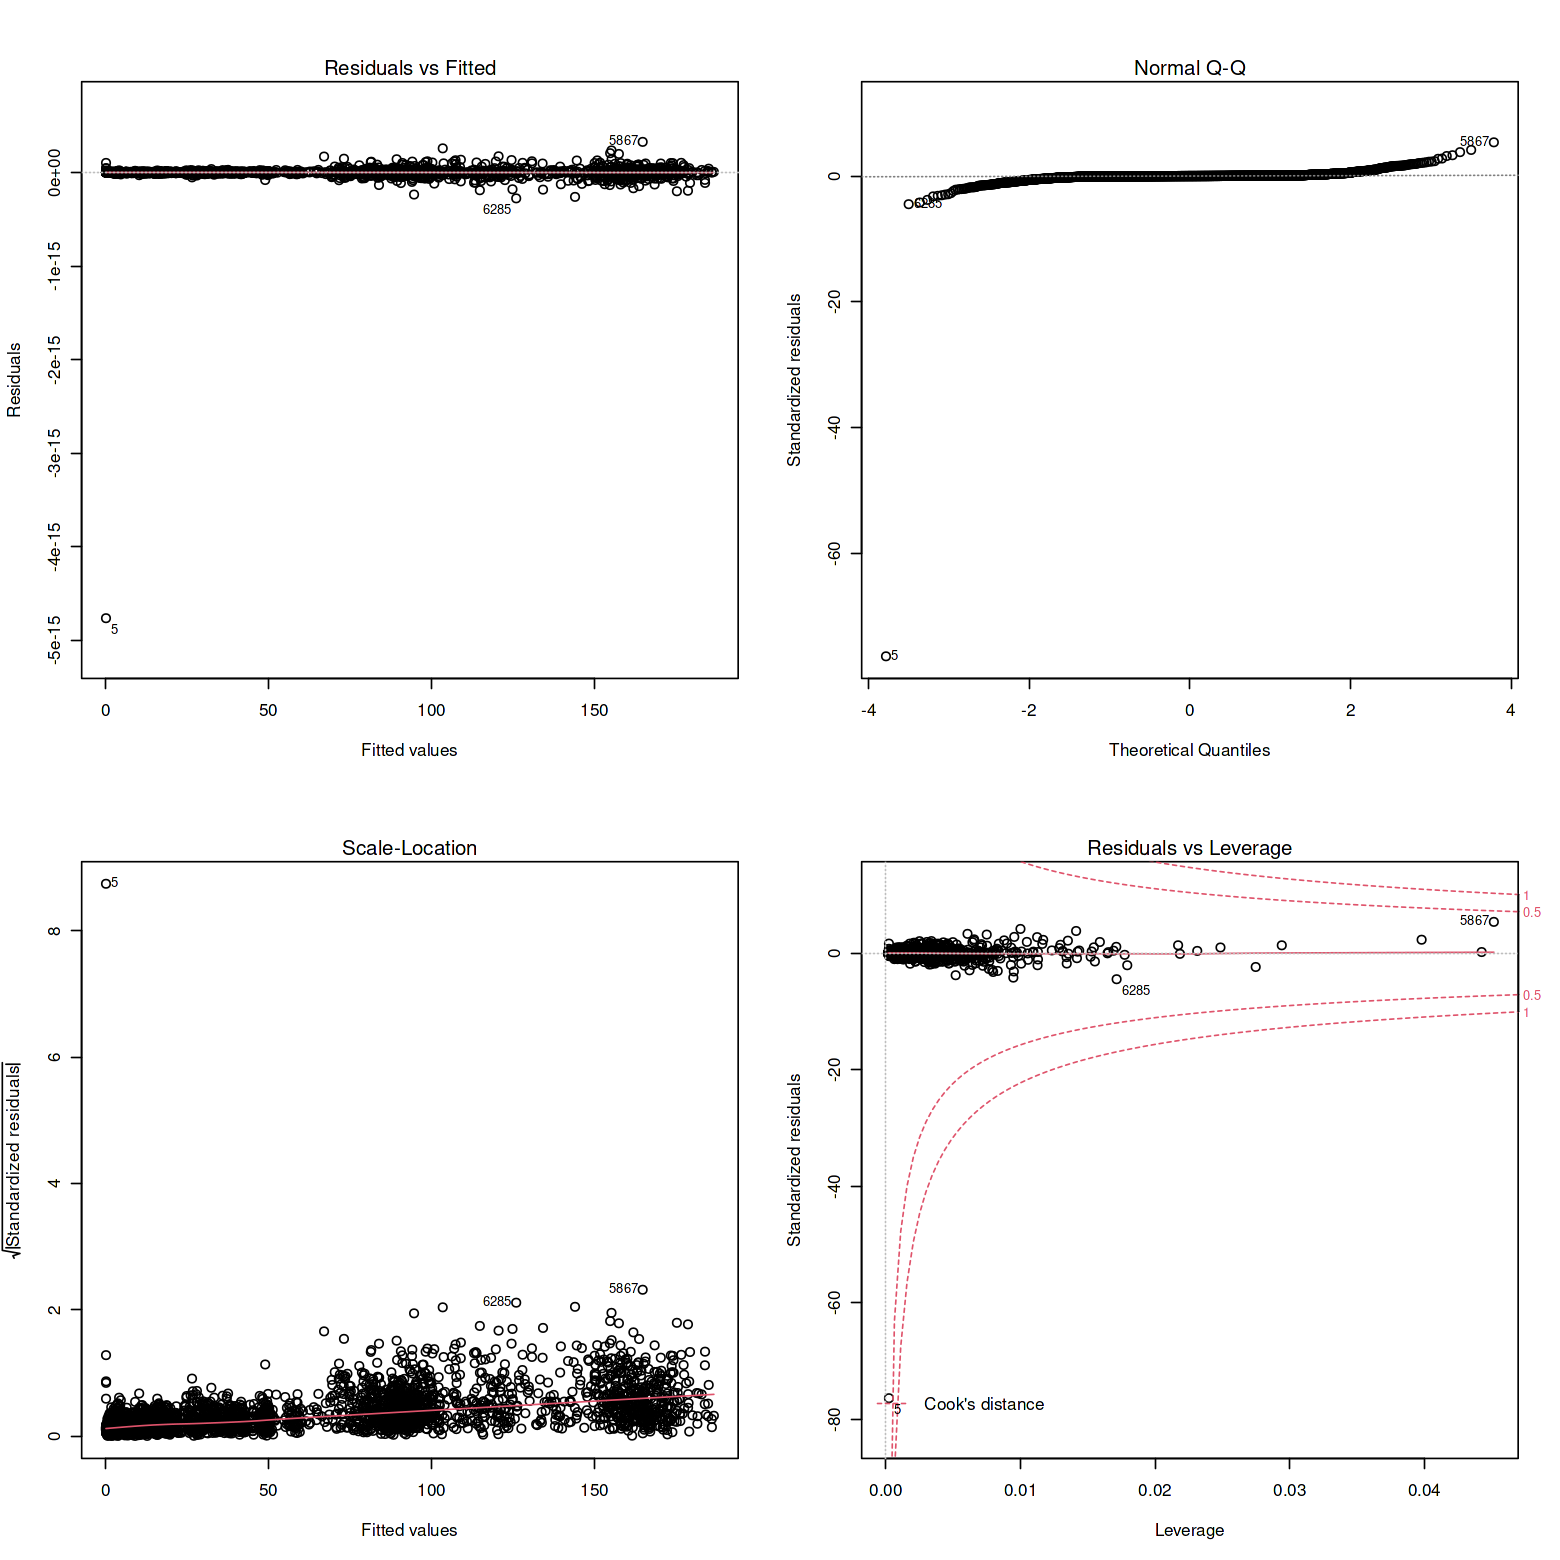

In [30]:
par(mfrow=c(2,2))
plot(LR)

In [31]:
pred <- predict(LR, data)

In [32]:
mse <- mse(data$Close,pred)
mae <- mae(data$Close,pred)

In [33]:
print(paste0('mse : ',mse))
print(paste0('mae : ',mae))

[1] "mse : 4.50627468667637e-30"
[1] "mae : 1.41196480876572e-15"


-----------

**Please leave your advice in the comments. Thank you**